<a href="https://colab.research.google.com/github/KiruuShinde01/KiruuShinde01/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

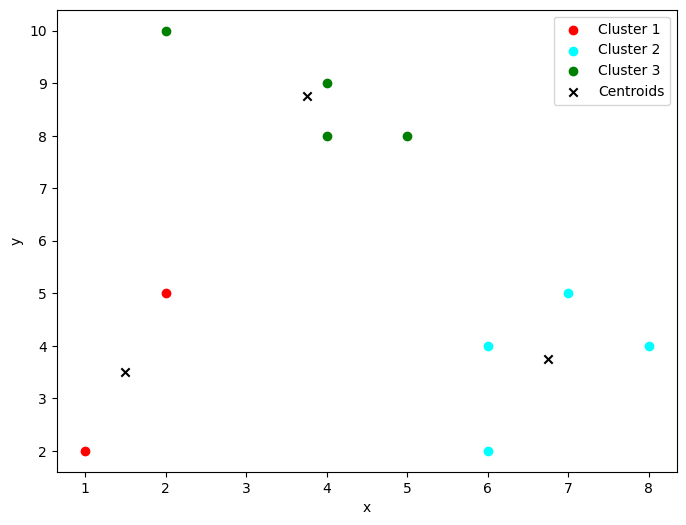

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def k_means_clustering(data, K, max_iterations=100):
    # Step 1: Randomly initialize centroids
    centroids = data[np.random.choice(range(len(data)), K, replace=False)]
    
    for _ in range(max_iterations):
        # Step 2: Assign data points to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        assigned_clusters = np.argmin(distances, axis=1)
        
        # Step 3: Update centroids
        new_centroids = np.array([data[assigned_clusters == k].mean(axis=0) for k in range(K)])
        
        # Check convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, assigned_clusters

# Example usage
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9], [6, 2], [4, 8]])
K = 3

centroids, assigned_clusters = k_means_clustering(data, K)

# Visualize the clusters
colors = ['r', 'cyan', 'g']
plt.figure(figsize=(8, 6))
for i in range(K):
    points = data[assigned_clusters == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', label='Centroids')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
